In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [56]:
pd.set_option("display.max_rows", None,'display.max_columns', None, 'display.width', 1000)
df = pd.read_csv("wireshark1.csv", index_col='No.')

In [82]:
#Data Wrangling
df.loc[df['Protocol'] == 'ARP', 'ProtocolNumber'] = '1'
df.loc[df['Protocol'] == 'UDP', 'ProtocolNumber'] = '2'
df.loc[df['Protocol'] == 'SSDP', 'ProtocolNumber'] = '3'
df.loc[df['Protocol'] == 'IGMPv3', 'ProtocolNumber'] = '4'
df.loc[df['Protocol'] == 'DHCPv6', 'ProtocolNumber'] = '5'
df.loc[df['Protocol'] == 'DNS', 'ProtocolNumber'] = '6'
df.loc[df['Protocol'] == 'HTTP', 'ProtocolNumber'] = '7'
df.loc[df['Protocol'] == 'ICMP', 'ProtocolNumber'] = '8'
df.loc[df['Protocol'] == 'ICMPv6', 'ProtocolNumber'] = '9'
df.loc[df['Protocol'] == 'TCP', 'ProtocolNumber'] = '10'
df.loc[df['Protocol'] == 'LLMNR', 'ProtocolNumber'] = '11'
df.loc[df['Protocol'] == 'MDNS', 'ProtocolNumber'] = '12'
df.loc[df['Protocol'] == 'NTP', 'ProtocolNumber'] = '13'
df.loc[df['Protocol'] == 'XID', 'ProtocolNumber'] = '14'
df.loc[df['Protocol'] == 'BROWSER', 'ProtocolNumber'] = '15'
df.loc[df['Protocol'] == 'NBNS', 'ProtocolNumber'] = '16'

#Assigning each Source IP a ID
df['id'] = df.groupby('Source').ngroup()

#Changing SPort and DPort NaN Values to 0
df['SPort'] = df['SPort'].fillna(0)
df['DPort'] = df['DPort'].fillna(0)

#Converting Values to Int to remove decimal place
df['SPort'] = df['SPort'].astype(int)
df['DPort'] = df['DPort'].astype(int)



#Assigning dfdos to df
dfdos = df

#Creating column total requests
df['Totalrequests'] = df.groupby('Source')['Source'].transform('count')

#Removing Unnecessary data for DOS
dfdos.drop(dfdos.loc[dfdos['Source']=='192.168.0.117'].index, inplace=True)
dfdos.drop(dfdos.loc[dfdos['Source']=='192.168.0.218'].index, inplace=True)
dfdos = dfdos[dfdos['Protocol'] != 'DNS']
dfdos = dfdos[dfdos['Protocol'] != 'ARP']
dfdos = dfdos[dfdos['Protocol'] != 'XID']
dfdos = dfdos[dfdos['Protocol'] != 'NTP']
dfdos = dfdos[dfdos['Protocol'] != 'DHCPv6']
dfdos = dfdos[dfdos['Protocol'] != 'SSDP']
dfdos = dfdos[dfdos['Protocol'] != 'IGMPv3']
dfdos = dfdos[dfdos['Protocol'] != 'MDNS']
dfdos = dfdos[dfdos['Protocol'] != 'LLMNR']
dfdos = dfdos[dfdos['Protocol'] != 'BROWSER']
dfdos = dfdos[dfdos['Protocol'] != 'ICMPv6']
dfdos = dfdos[dfdos['Protocol'] != 'NBNS']
dfdos = dfdos.reset_index(drop=True)

In [83]:
from sklearn.preprocessing import StandardScaler
df_Short = dfdos[['Time', 'TimeDiff', 'ProtocolNumber', 'Totalrequests', 'id']]
scale = StandardScaler()

scaled_dfdos = scale.fit_transform(df_Short)

In [84]:
#Function for Elbow Method
df_Short2 = scaled_dfdos

K= range(1,12)
wss = []
for k in K:
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans=kmeans.fit(df_Short2)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

C:\Users\donma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [85]:
#Viewing the WSS scores of the Clusters
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,8020.000000
1,2,4617.878155
2,3,3002.260371
3,4,2174.043227
4,5,1634.349751
5,6,1364.876027
6,7,1186.370461
7,8,1058.765769
8,9,946.409922
9,10,856.092568


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

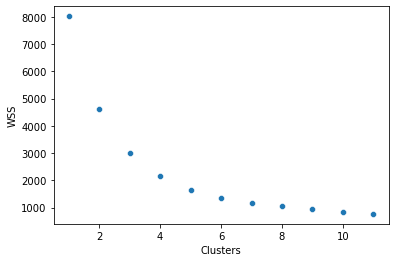

In [61]:
#Plot the Elbow 
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters,  marker = 'o')

In [86]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(scaled_dfdos)
y_predicted

array([2, 0, 3, ..., 4, 2, 4])

In [91]:
dfdos['cluster']=y_predicted
dfdoscheck = dfdos[dfdos.cluster==1]
dfdoscheck = dfdoscheck.reset_index(drop=True)
dfdoscheck

,Time,Source,Destination,Protocol,Length,Info,TimeDiff,SPort,DPort,ProtocolNumber,id,Totalrequests,cluster
0,314.479227,192.168.0.185,192.168.0.218,ICMP,60,"Echo (ping) request id=0xc628, seq=0/0, ttl=6...",0.292658,0,0,8,77,763,1
1,314.579684,192.168.0.185,192.168.0.218,ICMP,60,"Echo (ping) request id=0xc628, seq=256/1, ttl...",0.100327,0,0,8,77,763,1
2,314.680215,192.168.0.185,192.168.0.218,ICMP,60,"Echo (ping) request id=0xc628, seq=512/2, ttl...",0.100520,0,0,8,77,763,1
3,314.780744,192.168.0.185,192.168.0.218,ICMP,60,"Echo (ping) request id=0xc628, seq=768/3, ttl...",0.100517,0,0,8,77,763,1
4,314.883234,192.168.0.185,192.168.0.218,ICMP,60,"Echo (ping) request id=0xc628, seq=1024/4, tt...",0.035189,0,0,8,77,763,1
5,314.986682,192.168.0.185,192.168.0.218,ICMP,60,"Echo (ping) request id=0xc628, seq=1280/5, tt...",0.103439,0,0,8,77,763,1
6,315.087220,192.168.0.185,192.168.0.218,ICMP,60,"Echo (ping) request id=0xc628, seq=1536/6, tt...",0.074428,0,0,8,77,763,1
7,315.190670,192.168.0.185,192.168.0.218,ICMP,60,"Echo (ping) request id=0xc628, seq=1792/7, tt...",0.103439,0,0,8,77,763,1
8,315.293144,192.168.0.185,192.168.0.218,ICMP,60,"Echo (ping) request id=0xc628, seq=2048/8, tt...",0.102462,0,0,8,77,763,1
9,315.394640,192.168.0.185,192.168.0.218,ICMP,60,"Echo (ping) request id=0xc628, seq=2304/9, tt...",0.101485,0,0,8,77,763,1


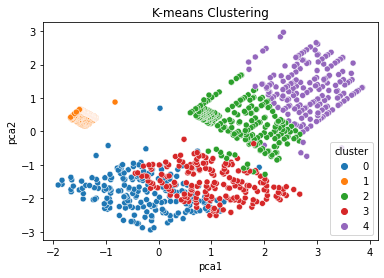

In [197]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=5).fit_transform(scaled_dfdos)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3','pca4','pca5'])


ax = sns.scatterplot(x="pca1", y="pca2", palette = "tab10", hue=dfdos['cluster'], data=results)

plt.title('K-means Clustering')
plt.show()

In [198]:
pca = PCA()
pca.fit(scaled_dfdos)
pca.explained_variance_ratio_

array([0.50243955, 0.24031312, 0.1198445 , 0.07438278, 0.06302005])

In [321]:
dfdos['Attack'] = 'Normal'
dfdos.loc[dfdos['Protocol'] == 'ICMP', 'Attack'] = 'DOS'

In [322]:
from sklearn.model_selection import train_test_split

In [323]:
dt = dfdos[['Time', 'TimeDiff', 'ProtocolNumber', 'Totalrequests', 'id']]
x = dt
y = dfdos['Attack']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10)

In [324]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=12)
clf = clf.fit(x_train, y_train)

In [325]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [326]:
predictions = clf.predict(x_test)

In [327]:
predictions2 = clf.predict(x_train)

In [328]:
#TEST DATA ACCURACY
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [329]:
#TRAIN DATA ACCURACY
from sklearn.metrics import accuracy_score
accuracy_score(y_train, predictions2)

1.0

In [330]:
#CONFUSION MATRIX TEST DATA
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['Normal','DOS'])

array([[84,  0],
       [ 0, 77]], dtype=int64)

In [331]:
#CONFUSION MATRIX TRAIN DATA
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, predictions2, labels=['Normal','DOS'])

array([[758,   0],
       [  0, 685]], dtype=int64)

In [332]:
feature_names = x.columns
feature_names

Index(['Time', 'TimeDiff', 'ProtocolNumber', 'Totalrequests', 'id'], dtype='object')

In [333]:
clf.feature_importances_

array([0.00277506, 0.        , 0.        , 0.99722494, 0.        ])

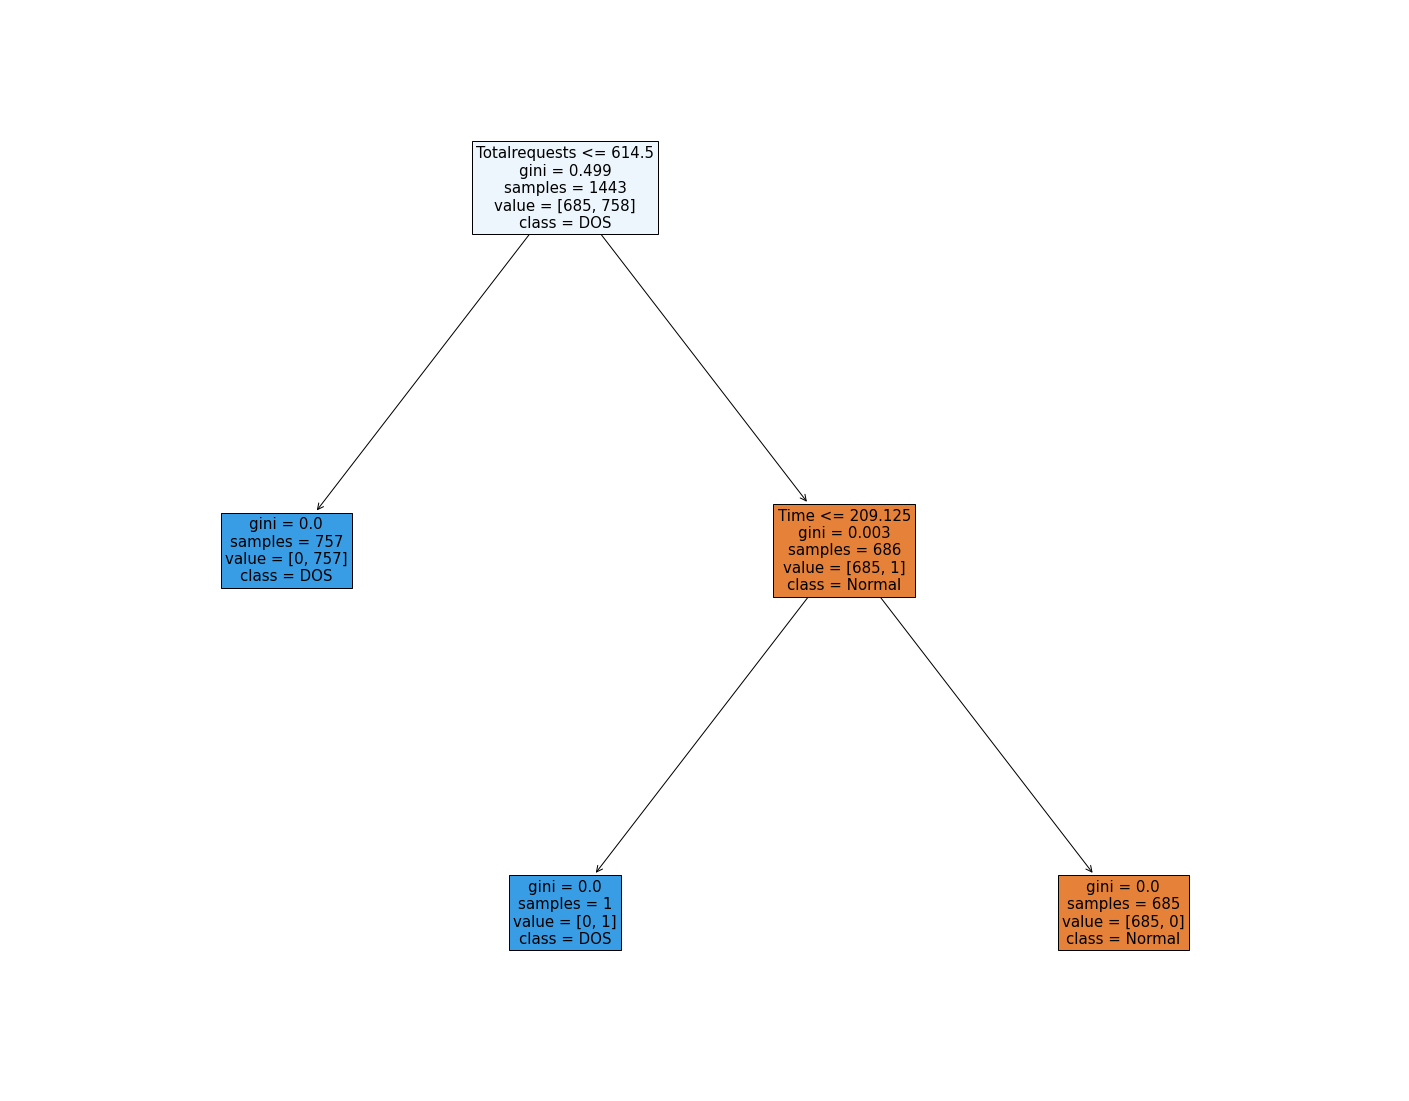

In [334]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                  feature_names=feature_names,
                  class_names={0:'Normal', 1:'DOS'},
                  filled=True,
                  fontsize=15)

In [335]:
#Adding all decision tree predicted data to make bar graph against actual data
dtbartest = x_test
dtbartest['predicted'] = predictions
dtbartrain = x_train
dtbartrain['predicted'] = predictions2

C:\Users\donma\AppData\Local\Temp/ipykernel_10684/1537299969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtbartest['predicted'] = predictions
C:\Users\donma\AppData\Local\Temp/ipykernel_10684/1537299969.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtbartrain['predicted'] = predictions2


In [336]:
finaldt = pd.concat([dtbartest, dtbartrain])

predicted
DOS       762
Normal    842
dtype: int64

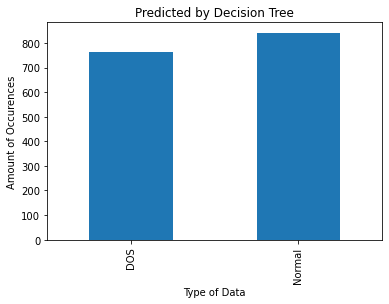

In [337]:
predicted_bardata = finaldt.groupby('predicted').size()
predicted_bardata.plot(kind="bar",xlabel="Type of Data",
ylabel="Amount of Occurences", title="Predicted by Decision Tree")
predicted_bardata

Attack
DOS       762
Normal    842
dtype: int64

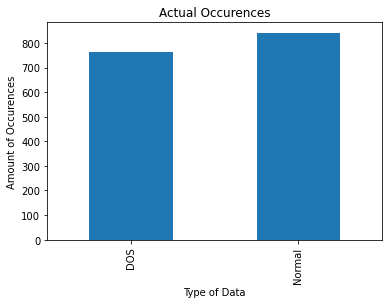

In [338]:
actual_bardata = dfdos.groupby('Attack').size()
actual_bardata.plot(kind="bar",xlabel="Type of Data",
ylabel="Amount of Occurences", title="Actual Occurences")
actual_bardata